In [171]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 

In [172]:
data=pd.read_csv('sphist.csv')

In [173]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


In [174]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [175]:
#fixing date
data['Date']=pd.to_datetime(data['Date'])

In [176]:
data.describe(include='all')

,Date,Open,High,Low,Close,Volume,Adj Close
count,16590,16590.000000,16590.000000,16590.000000,16590.000000,1.659000e+04,16590.000000
unique,16590,NaN,NaN,NaN,NaN,NaN,NaN
top,1967-09-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
first,1950-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,2015-12-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,482.570941,485.624237,479.367501,482.692491,7.940099e+08,482.692491
std,NaN,554.889186,558.186049,551.367625,555.007904,1.456582e+09,555.007904
min,NaN,16.660000,16.660000,16.660000,16.660000,6.800000e+05,16.660000
25%,NaN,83.860001,84.594997,83.139997,83.860001,7.610000e+06,83.860001


In [177]:
#we set a date test of the 1st of april 2015 
#we do not use it
mask_date =data['Date'] > datetime(year=2015, month=4, day=1)
mask_date.value_counts()

False    16417
True       173
Name: Date, dtype: int64

In [178]:
#sorting dataframe by date in ascending order
data=data.sort_values('Date')

In [179]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08


## creation of new indicators
We want to create a new indicators (features) that take the average of the last x days, but careful, on the actual row, do not use the price of the day as this is what we want to compare the average to. 
the close column is supposed the price.


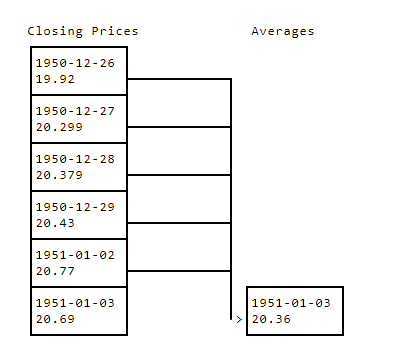


we will compute for 5, 30 and 365 days

There are a few different ways to do this:

- You can use a for loop along with the [iterrows](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html) method to loop over the rows in the DataFrame and compute the indicators. This is the recommended way, as it's a bit simpler to understand what's happening. Since you'll be looping over all of the rows, for any date that comes before there is enough historical data to compute an indicator, just fill in 0.
- Pandas has some [time series tools](http://pandas.pydata.org/pandas-docs/stable/computation.html) that can help, including the [rolling](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) function, which will do most of the hard computation for you. Set the window equal to the number of trading days in the past you want to use to compute the indicators. This will add in NaN values for any row where there aren't enough historical trading days to do the computation. Note: There is a giant caveat here, which is that the rolling mean will use the current day's price. You'll need to reindex the resulting series to shift all the values "forward" one day. For example, the rolling mean calculated for 1950-01-03 will need to be assigned to 1950-01-04, and so on. You can use the shift method on Dataframes to do this.


In [180]:
#while we through through each rows
#we compute the mean of the x last days close pricebefore the rows analysed easy peasy

for n in [5,30,365]:
    avrg_col_name='avrg_last_'+str(n)+'days' #mean price columns
    vol_avrg_col_name='Vol_avg_last'+str(n)+'days' #Vol mean columns
    for index, row in data.iterrows():
        start_index = index + n   #checking we have enough days before the actual date
        if start_index not in data.index:
            data.loc[index, avrg_col_name] = 0     #otherwise 0
            data.loc[index, vol_avrg_col_name]=0
        else:
            #computing of the mean of close price of the n days before
            n_days_means=data.loc[index+n:index+1]['Close'].mean()
            data.loc[index,avrg_col_name]=n_days_means
            #computing the mean of the Volume of the n days before
            volume_mean_n_days=data.loc[index+n:index+1]['Volume'].mean()
            data.loc[index,vol_avrg_col_name]=volume_mean_n_days

In [181]:
#computing the std dev for for pric and volume for 5,30, and 365 days
for n in [5,30,365]:
    std_col_name='std_last_'+str(n)+'days'
    std_vol_col_name='std_vol_last'+str(n)+'days' #Vol mean columns
    for index, row in data.iterrows():
        start_index = index + n   #checking we have enough days before the actual date
        if start_index not in data.index:
            data.loc[index, std_col_name] = 0     #otherwise 0
            data.loc[index, std_vol_col_name]=0
        else:
            #computing of the mean of close price of the n days before
            n_days_std=data.loc[index+n:index+1]['Close'].std()
            data.loc[index,std_col_name]=n_days_std
            #computing the std of the Volume of the n days before
            volume_std_n_days=data.loc[index+n:index+1]['Volume'].std()
            data.loc[index,std_vol_col_name]=volume_std_n_days

In [182]:
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close,avrg_last_5days,Vol_avg_last5days,avrg_last_30days,Vol_avg_last30days,avrg_last_365days,Vol_avg_last365days,std_last_5days,std_vol_last5days,std_last_30days,std_vol_last30days,std_last_365days,std_vol_last365days
16589,1950-01-03,16.66,16.66,16.66,16.66,1260000.0,16.66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16588,1950-01-04,16.85,16.85,16.85,16.85,1890000.0,16.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16587,1950-01-05,16.93,16.93,16.93,16.93,2550000.0,16.93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16586,1950-01-06,16.98,16.98,16.98,16.98,2010000.0,16.98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16585,1950-01-09,17.08,17.08,17.08,17.08,2520000.0,17.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


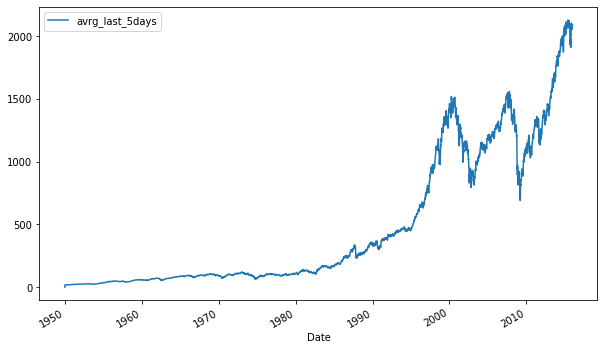

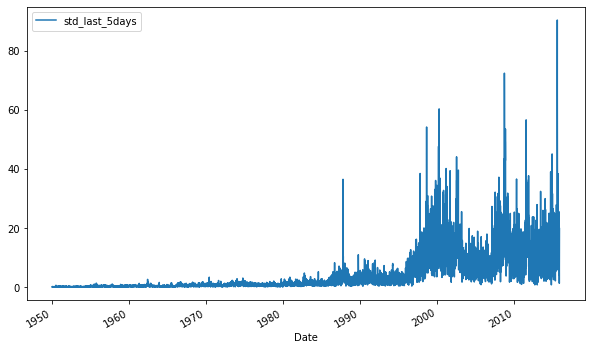

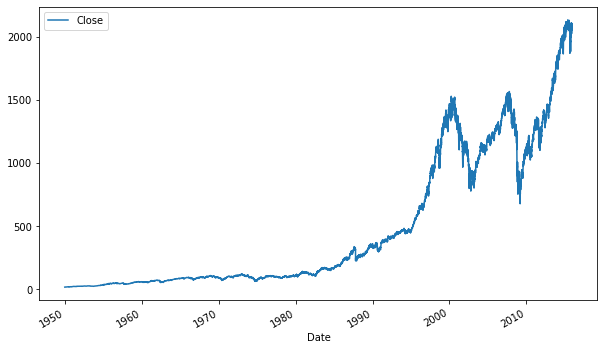

In [183]:
data.plot('Date','avrg_last_5days',figsize=(10,6))
data.plot('Date','std_last_5days',figsize=(10,6))
data.plot('Date','Close',figsize=(10,6))

## split of the dataset in train/test 
we are interested only by data after 1951-03-1 as otherwise they are not enough data to compute all the indicators (365 days)

In [184]:
data.isnull().sum()
#no need to drop any rows as they are no empty data

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Adj Close              0
avrg_last_5days        0
Vol_avg_last5days      0
avrg_last_30days       0
Vol_avg_last30days     0
avrg_last_365days      0
Vol_avg_last365days    0
std_last_5days         0
std_vol_last5days      0
std_last_30days        0
std_vol_last30days     0
std_last_365days       0
std_vol_last365days    0
dtype: int64

In [185]:
data = data[data['Date'] > datetime(year=1951, month=1, day=2)]

In [186]:
#split train test
train =  data[data['Date'] < datetime(year=2013, month=1, day=1)]
test = data[data['Date'] >= datetime(year=2013, month=1, day=1)]

In [187]:
train.shape

(15601, 19)

### Make prediction

we gonna use [linearegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and the error metric will the [mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) but the [|mean squared error] can also be used but less intuitive.

We leave out all the original col

In [188]:
from sklearn.linear_model import LinearRegression

In [189]:
lr=LinearRegression()

In [190]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
       'avrg_last_5days', 'Vol_avg_last5days', 'avrg_last_30days',
       'Vol_avg_last30days', 'avrg_last_365days', 'Vol_avg_last365days',
       'std_last_5days', 'std_vol_last5days', 'std_last_30days',
       'std_vol_last30days', 'std_last_365days', 'std_vol_last365days'],
      dtype='object')

In [191]:
data.corr()['Close'].sort_values()

std_vol_last5days      0.617935
std_vol_last365days    0.684827
std_vol_last30days     0.684980
std_last_5days         0.723336
Volume                 0.773326
std_last_30days        0.779433
Vol_avg_last5days      0.781393
Vol_avg_last365days    0.785353
Vol_avg_last30days     0.787395
std_last_365days       0.816945
avrg_last_365days      0.988923
avrg_last_30days       0.999193
avrg_last_5days        0.999794
Open                   0.999900
High                   0.999953
Low                    0.999956
Adj Close              1.000000
Close                  1.000000
Name: Close, dtype: float64

In [192]:
features=['avrg_last_5days', 'avrg_last_30days', 'avrg_last_365days',
          'std_last_5days', 'std_last_30days', 'std_last_365days']

In [193]:
#fitting model
lr.fit(train[features],train['Close'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [194]:
predictions=lr.predict(test[features])

In [195]:
from sklearn.metrics import mean_absolute_error 

In [196]:
mean_absolute_error(test['Close'],predictions)


16.214135818661475

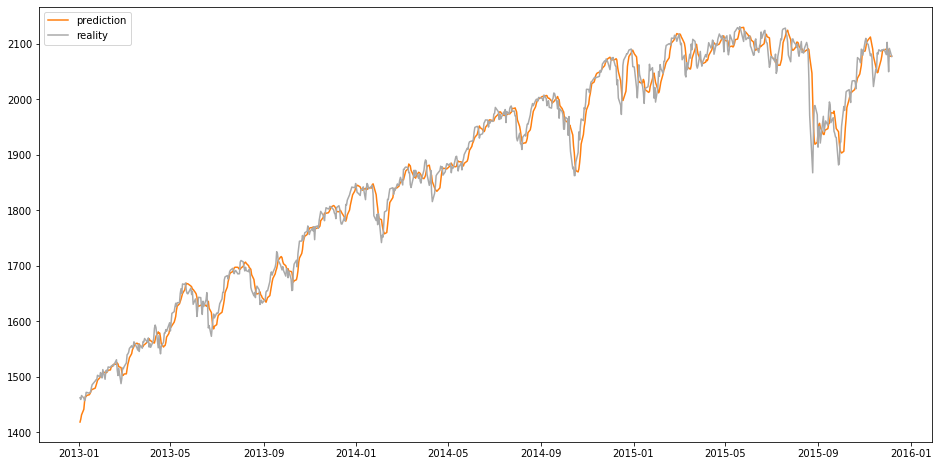

In [197]:
plt.figure(figsize=(16,8))
plt.plot(test['Date'],predictions,label='prediction',color='C1')
plt.plot(test['Date'],test['Close'],label='reality',color='darkgrey')
plt.legend()

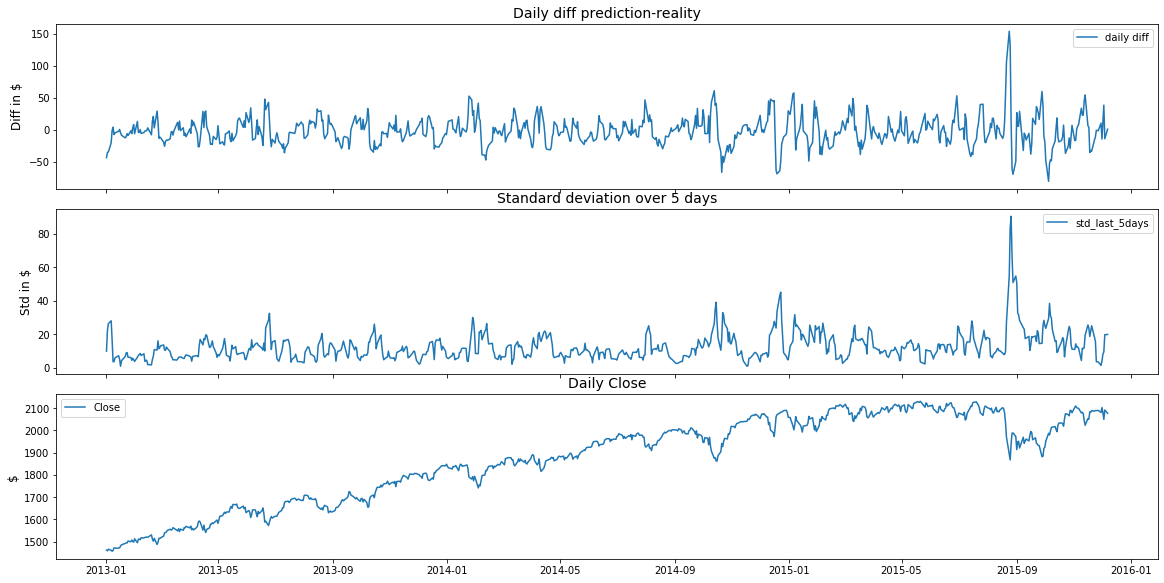

In [297]:
#compute daily differences

daily_diff=predictions-test['Close']


mask_date =data['Date'] > datetime(year=2013, month=1, day=1)
temp_df=data[mask_date]

padding=1
figsize=(16,8)

fig,ax=plt.subplots(3, 1, sharex=True,
                    figsize=figsize )

fig.tight_layout(pad=padding)


ax[0].plot(test['Date'],daily_diff,label='daily diff')
ax[1].plot(temp_df['Date'],temp_df['std_last_5days'],label='std_last_5days')
ax[2].plot(temp_df['Date'],temp_df['Close'],label='Close')

ylabels=['Diff in $',"Std in $","$"]
subtitles=['Daily diff prediction-reality',
      'Standard deviation over 5 days',
      'Daily Close']           
ax[0].set_title('Daily diff prediction-reality')
for i in range(0,3):
    ax[i].legend()
    ax[i].set_ylabel(ylabels[i],size=12)
    ax[i].set_title(subtitles[i],size=14)
           
fig.savefig(f'error best model with {opti_n_features}.png')


we can observe that the model is always delayed compared to reality but could be expected

### second model with Volume features
the selection of the features will be done by ranking the columns based on their correlation and trained several models then compute and plot the RMSE to know which one look like the best number of features

In [199]:
all_features=data.corr()['Close'].sort_values(ascending=False).index

In [200]:
all_features=all_features.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'])

In [201]:
all_features

Index(['avrg_last_5days', 'avrg_last_30days', 'avrg_last_365days',
       'std_last_365days', 'Vol_avg_last30days', 'Vol_avg_last365days',
       'Vol_avg_last5days', 'std_last_30days', 'std_last_5days',
       'std_vol_last30days', 'std_vol_last365days', 'std_vol_last5days'],
      dtype='object')

In [202]:

max_all_features=len(all_features)
#index_last_feature=1
all_mse=[]
features_used=[]
for i in range(1,max_all_features+1):
    features2=all_features[0:i]
    lr2=LinearRegression()
    lr2.fit(train[features2],train['Close'])
    predictions2=lr2.predict(test[features2])
    mse=mean_absolute_error(test['Close'],predictions2)
    features_used.append(list(features2))
    all_mse.append(mse)

In [203]:
#find the optimal number of features
opti_n_features=all_mse.index(min(all_mse))

In [204]:
features_used[0]

['avrg_last_5days']

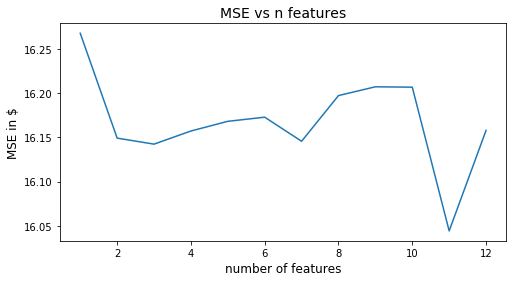

In [205]:
plt.figure(figsize=(8,4))
plt.plot(range(1,len(all_mse)+1),all_mse)
plt.xlabel('number of features',size=12)
plt.ylabel('MSE in $',size=12)
plt.title("MSE vs n features",size=14)

plt.savefig('optimal_n_features_models.png')

In [206]:
best_features=all_features[0:opti_n_features+1]
lr3=LinearRegression()
lr3.fit(train[best_features],train['Close'])
predictions3=lr3.predict(test[best_features])
mse=mean_absolute_error(test['Close'],predictions3)
mse

16.044232853665573

In [207]:
best_features

Index(['avrg_last_5days', 'avrg_last_30days', 'avrg_last_365days',
       'std_last_365days', 'Vol_avg_last30days', 'Vol_avg_last365days',
       'Vol_avg_last5days', 'std_last_30days', 'std_last_5days',
       'std_vol_last30days', 'std_vol_last365days'],
      dtype='object')

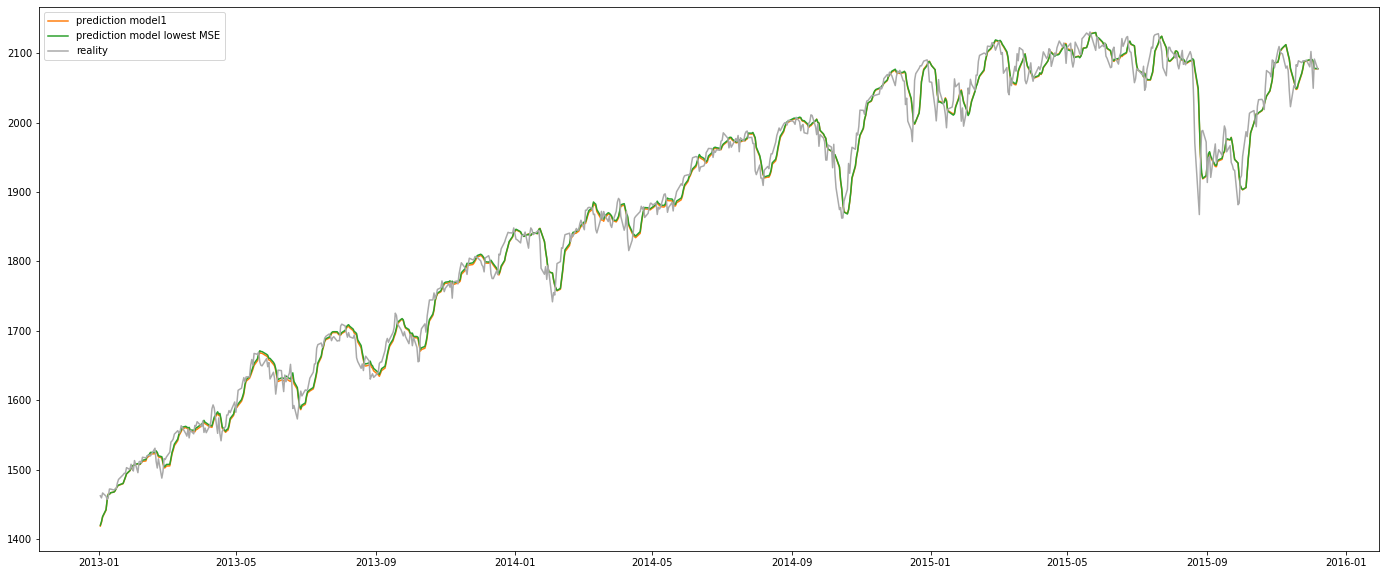

In [208]:
plt.figure(figsize=(24,10))
plt.plot(test['Date'],predictions,label='prediction model1',color='C1')
plt.plot(test['Date'],predictions3,label='prediction model lowest MSE',color='C2')
plt.plot(test['Date'],test['Close'],label='reality',color='darkgrey')
plt.legend()
plt.savefig('prediction_vs_reality.pdf')

### to go further:
Here a few other indicators to go further, they should be computing at the same time than the others before the train/test split and the remove of NaN.

- The average volume over the past five days. DONE
- The average volume over the past 30 days. DONE
- The average volume over the past year. DONE
- The ratio between the average volume for the past five days, and the average volume for the past year.
- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.
- The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
- The year component of the date.
- The ratio between the lowest price in the past year and the current price.
- The ratio between the highest price in the past year and the current price.
- The month component of the date.
- The day of week.
- The day component of the date.
- The number of holidays in the prior month.

- The average volume over the past year.
- The ratio between the average volume for the past five days, and the average volume for the past year.
- The standard deviation of the average volume over the past five days.
- The standard deviation of the average volume over the past year.
- The ratio between the standard deviation of the average volume for the past five days, and the standard deviation of the average volume for the past year.
- The year component of the date.
- The ratio between the lowest price in the past year and the current price.
- The ratio between the highest price in the past year and the current price.
- The month component of the date.
- The day of week.
- The day component of the date.
- The number of holidays in the prior month.


Accuracy would improve greatly by making predictions only one day ahead. For example, train a model using data from 1951-01-03 to 2013-01-02, make predictions for 2013-01-03, and then train another model using data from 1951-01-03 to 2013-01-03, make predictions for 2013-01-04, and so on. This more closely simulates what you'd do if you were trading using the algorithm.

You can also improve the algorithm used significantly. Try other techniques, like a random forest, and see if they perform better.

You can also incorporate outside data, such as the weather in New York City (where most trading happens) the day before, and the amount of Twitter activity around certain stocks.

You can also make the system real-time by writing an automated script to download the latest data when the market closes, and make predictions for the next day.

Finally, you can make the system "higher-resolution". You're currently making daily predictions, but you could make hourly, minute-by-minute, or second by second predictions. This will require obtaining more data, though. You could also make predictions for individual stocks instead of the S&P500.